# Data Science Internship - TopperWorld

# Author - Prathamesh Rajendra Goswami

# Task 1 - Detection Of Road Lane Line

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['road-image-with-lanes', 'video-file-for-lane-detection-project']


# Step 1 :

# Load the file and show

In [2]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display
%matplotlib inline

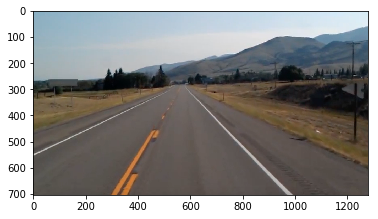

In [3]:
image =cv2.cvtColor(cv2.imread("../input/road-image-with-lanes/test_image.jpg"), cv2.COLOR_BGR2RGB) 

plt.imshow(image)
plt.show()

In [4]:
import numpy as np

lane_image = np.copy(image)
lane_image.shape

(704, 1279, 3)

# Step 2 :

# Gray scale conversion of the image

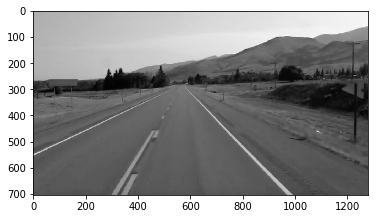

In [5]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap='gray')
plt.show()

# Step 3 :

# Apply Gausian Blur to reduce the noise in the gray scale image


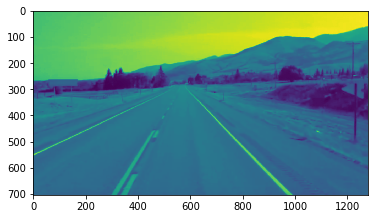

In [6]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(blur)
plt.show()

# Step 4 :

# Apply canny method 

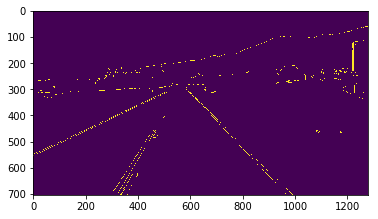

In [7]:
canny = cv2.Canny(blur, 50,150)

plt.imshow(canny)
plt.show()

In [8]:
# put all the previous 3 steps in one function 
# gray scale conversion ==> applying gaussian blur ==> applying canny function

def Canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    
    return canny

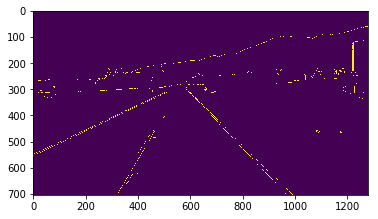

In [9]:
image = cv2.imread("../input/road-image-with-lanes/test_image.jpg")
lane_image = np.copy(image)
canny = Canny(lane_image)

plt.imshow(canny)
plt.show()

• Make a function to find region of interest.

• The region where we wanna find the lanes

• Then, apply bitwise AND operation in order to select just the region of interest

• Hough transform in order to find straight lines in the image

In [10]:
# make a function to find region of interest. 
# then, apply bitwise AND operation in order to select just the region of interest

def region_of_interest(image):
    height = 700
    polygons = np.array([[(250,height), (1000,height), (600,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_region = cv2.bitwise_and(image, mask)
    
    return masked_region

In [11]:
# function which draws lines as detected lanes in the black image

def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
    return line_image

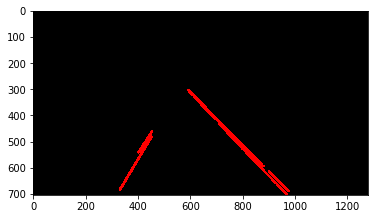

In [12]:
# reading the image and then calling all the functions one by one. 

image = cv2.imread("../input/road-image-with-lanes/test_image.jpg")

lane_image = np.copy(image)
canny_image = Canny(lane_image)
cropped_image = region_of_interest(canny_image)

lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), 40, 5)
line_image = display_lines(lane_image, lines)

plt.imshow(line_image)
plt.show()

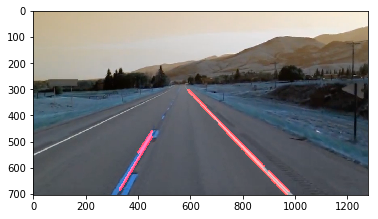

In [13]:
# final step: put it all together
# now combine the above immage containing just the lines in a black image with our original image

combo_image = cv2.addWeighted(lane_image, 1, line_image, 1, 1)

plt.imshow(combo_image)
plt.show()

• Do some optimization to refine the detection of lanes

In [14]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

In [15]:
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2), (y1,y2), 1)
        
        slope = parameters[0]
        intercept = parameters[1]
        
        if slope < 0:
            left_fit.append((slope, intercept))
        elif slope >= 0:
            right_fit.append((slope, intercept))
            
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
        
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
        
    return np.array([left_line, right_line])

• Again doing all the steps

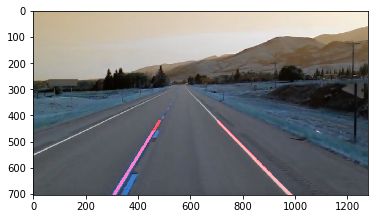

In [16]:
# reading the image and then calling all the functions one by one. 

image = cv2.imread("../input/road-image-with-lanes/test_image.jpg")

lane_image = np.copy(image)
canny_image = Canny(lane_image)
cropped_image = region_of_interest(canny_image)

lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), 40, 5)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)

# final step: put it all together
# now combine the above immage containing just the lines in a black image with our original image

combo_image = cv2.addWeighted(lane_image, 1, line_image, 1, 1)

plt.imshow(combo_image)
plt.show()

• Now apply the same methods on a video file

• Which will take each frame of the video file

• and detect the lanes in each frame
 
• Finally play all the frames showing lanes detected in a video.

In [17]:
cap = cv2.VideoCapture("../input/video-file-for-lane-detection-project/test_video.mp4")

#while (cap.isOpened()):
#    _, frame = cap.read()
#    canny_image = Canny(frame)
#    cropped_image = region_of_interest(canny_image)
#    lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), 40, 5)
#    averaged_lines = average_slope_intercept(frame, lines)
#    line_image = display_lines(frame, averaged_lines)
#    combo_image = cv2.addWeighted(frame, 1, line_image, 1, 1)
    
#    cv2.imshow("result", combo_image)
#    if cv2.waitKey(1) == ord("q"):
#        break
#cap.release()
#cv2.destroyAllWindows()